# Analisis de  la retención de usuarios a lo largo del tiempo.

---

## Objetivo:

- Cuántos usuarios abandonan la plataforma (churn)
- Cuánto tiempo permanecen activos
- Si existen diferencias entre tipos de usuarios

Este análisis nos ayudará a entender la calidad del producto y la experiencia del usuario.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
plt.style.use("default")


Carga de datos de usuarios y sesiones.


In [3]:
users = pd.read_csv("../data/raw/users.csv")
sessions = pd.read_csv("../data/raw/sessions.csv")

Revisión de la información básica del dataset de usuarios.


In [4]:
users.head()

,user_id,signup_date,country,acquisition_channel,utm_campaign,first_device,gender,age,plan,marketing_opt_in,is_churned,churn_date
0,1,2024-03-04,AR,affiliate,NaN,mobile,male,23,free,False,False,NaN
1,2,2025-07-07,US,organic,retargeting,desktop,male,27,basic,True,False,NaN
2,3,2025-04-13,FR,organic,spring_sale,mobile,female,38,basic,True,False,NaN
3,4,2024-11-09,US,organic,NaN,mobile,female,33,enterprise,True,False,NaN
4,5,2024-11-05,ES,affiliate,brand,desktop,unknown,28,free,NaN,True,2025-02-21


Conversión de las columnas de fechas.


In [5]:
users["signup_date"] = pd.to_datetime(users["signup_date"])
users["churn_date"] = pd.to_datetime(users["churn_date"])


Calculo usuarios han abandonado la plataforma.


In [6]:
churn_counts = users["is_churned"].value_counts()
churn_counts


is_churned
False    31139
True     18861
Name: count, dtype: int64

Visualización de la proporción de usuarios que han abandonado vs. siguen activos.


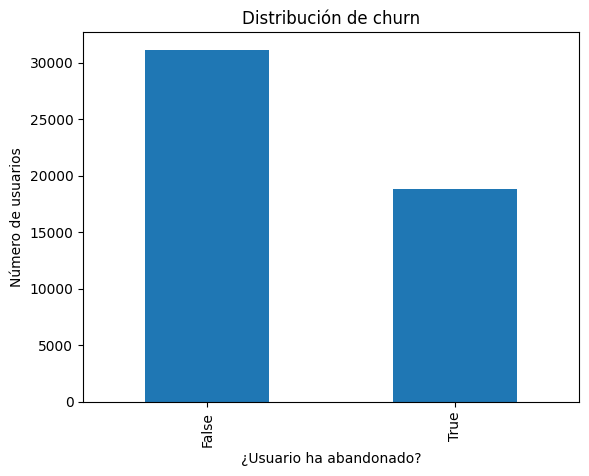

In [7]:
churn_counts.plot(kind="bar")
plt.title("Distribución de churn")
plt.xlabel("¿Usuario ha abandonado?")
plt.ylabel("Número de usuarios")
plt.show()


Cálculo  dias desde registro hasta abandono.


In [8]:
users["lifetime_days"] = (users["churn_date"] - users["signup_date"]).dt.days
users["lifetime_days"].describe()


count    18861.000000
mean        99.806479
std         96.128163
min          0.000000
25%         29.000000
50%         70.000000
75%        140.000000
max        699.000000
Name: lifetime_days, dtype: float64

Visualización de la permanencia de usuarios antes de abandonar.


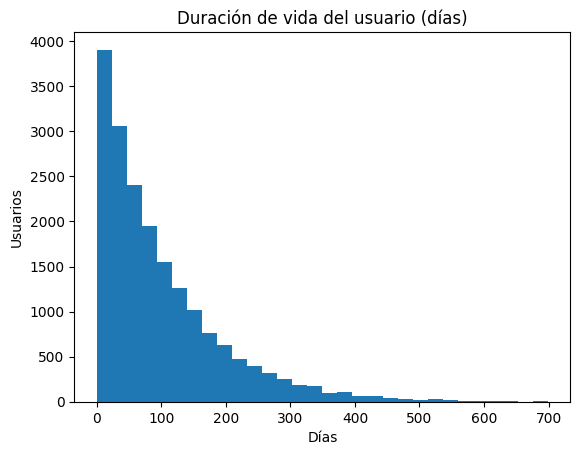

In [9]:
users["lifetime_days"].dropna().plot(kind="hist", bins=30)
plt.title("Duración de vida del usuario (días)")
plt.xlabel("Días")
plt.ylabel("Usuarios")
plt.show()


Analisis diferencias de churn según plan contratado.


In [10]:
churn_by_plan = users.groupby("plan")["is_churned"].mean()
churn_by_plan


plan
basic         0.301828
enterprise    0.094433
free          0.473733
pro           0.195129
Name: is_churned, dtype: float64

Muestra de gráfica de  la tasa de churn por plan.


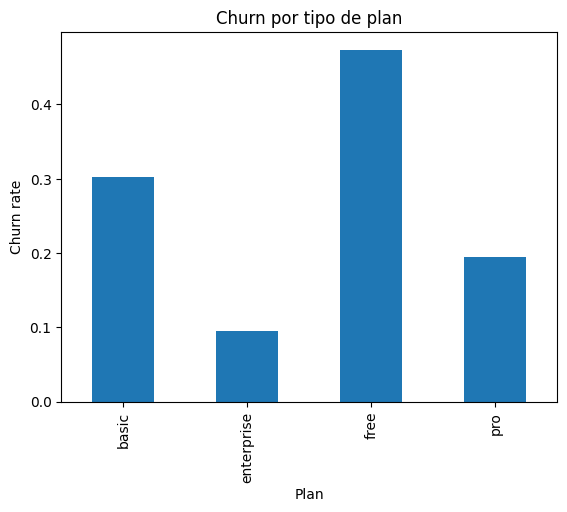

In [11]:
churn_by_plan.plot(kind="bar")
plt.title("Churn por tipo de plan")
plt.xlabel("Plan")
plt.ylabel("Churn rate")
plt.show()


Observaciones:

- Existen diferencias claras de churn entre los distintos planes.
- Algunos usuarios abandonan rápidamente tras registrarse.
- El tipo de plan parece influir en la retención.
